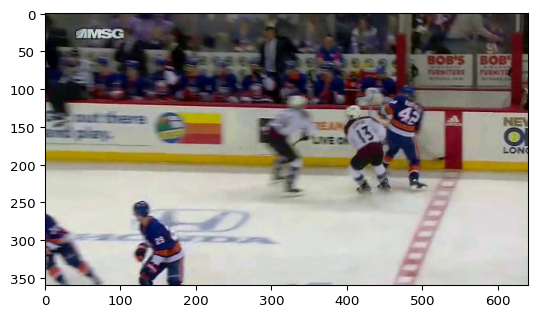

In [34]:
import imageio
import imgaug as ia
%matplotlib inline

frame = 0
image = imageio.imread('./_2017-11-05-col-nyi-home10/frame_0000.png')

image = ia.imresize_single_image(image, (360, 640))
ia.imshow(image)

In [35]:
import json
import re 
with open('./_2017-11-05-col-nyi-home10/_2017-11-05-col-nyi-home10.json', 'r') as f:
    pose = json.load(f)

frame_0_pose = pose[frame]
# print(frame_0_pose)

In [36]:
keys = set().union(*(d.keys() for d in pose))
keys.remove('frameNum')
all_players = list(keys)
# print(all_players)

In [37]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

all_players.sort(key=natural_keys)

print(all_players)


['p1', 'p2', 'p3', 'p4', 'p5']


In [38]:
# def atoi(text):
#     return int(text) if text.isdigit() else text
#
# def natural_keys(text):
#     return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [39]:
from imgaug.augmentables.kps import Keypoint
kps = []

for key in all_players:
    body = frame_0_pose[key]
    for i in range(0,48,3):
#         print(key,i)
        x = body[i]
        y = body[i+1]
        kps.append(Keypoint(x,y))
            
            

In [40]:
# print(kps)

In [41]:
from imgaug.augmentables.kps import Keypoint, KeypointsOnImage

In [42]:
# kps = [
#     Keypoint(x=387.4524, y=109.31219999999999),   # left eye (from camera perspective)
#     Keypoint(x=400.587, y=120.856),
#     Keypoint(x=276.6616, y=177.1174),  # right eye
#     Keypoint(x=270.5, y=196.5),
#     Keypoint(x=0.0, y=0.0), # nose
#     Keypoint(x=0.0, y=0.0),
#     Keypoint(x=16.5, y=240.0), # left paw
#     Keypoint(x=19.5, y=264.0),
#     Keypoint(x=0.0, y=0.0),  # right paw
#     Keypoint(x=0.0, y=0.0)
# ]

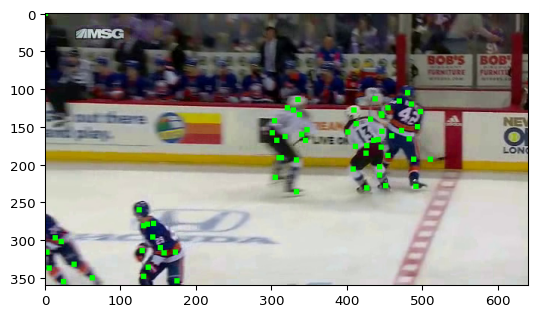

In [43]:
kpsoi = KeypointsOnImage(kps, shape=image.shape)

ia.imshow(kpsoi.draw_on_image(image, size=7))

In [44]:


# print(kpsoi.keypoints)



In [45]:
import imgaug.augmenters as iaa
ia.seed(3)

seq = iaa.Sequential([
    iaa.flip.Fliplr(p=1)
    #iaa.Affine(rotate=(180, 180))
    #iaa.AddToHueAndSaturation((-50, 50))  # color jitter, only affects the image
])

In [46]:


image_aug, kpsoi_aug = seq(image=image, keypoints=kpsoi)



In [47]:
# print(kpsoi_aug)

In [48]:
# for element1, element2 in zip(kpsoi_aug,kpsoi) :
#     print(element1.x + element2.x)
#     print(element1.y - element2.y)
    
    

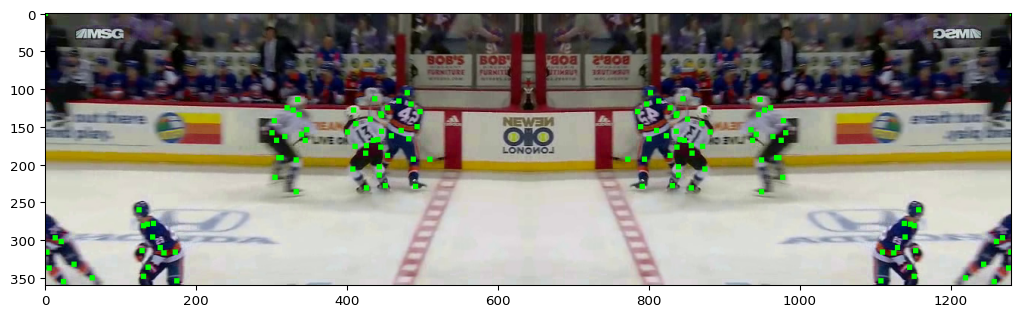

In [49]:
import numpy as np
ia.imshow(
    np.hstack([
        kpsoi.draw_on_image(image, size=7),
        kpsoi_aug.draw_on_image(image_aug, size=7)
    ])
)

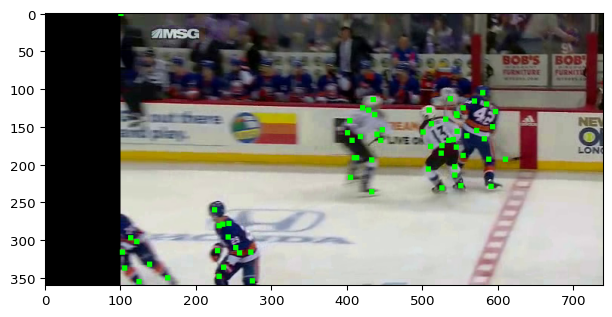

In [50]:
image_pad = ia.pad(image, left=100)
kpsoi_pad = kpsoi.shift(x=100)
ia.imshow(kpsoi_pad.draw_on_image(image_pad, size=7))